In [22]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as img
import PIL
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
import random 
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input , MaxPool2D , Conv2D , Flatten , Dense , Dropout 
from tensorflow.keras import optimizers 
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.xception import Xception 
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.vgg19 import VGG19 
from glob import glob 
import pathlib 
import os 
from sklearn.preprocessing import LabelEncoder  
from sklearn.utils import resample  
from keras.utils import to_categorical  
from sklearn.model_selection import train_test_split 
np.random.seed(101)

In [23]:
# reading the data from the csv file 
skin_df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

#getting the image path for the images using the csv 
image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('/kaggle/input/skin-cancer-mnist-ham10000/', '*', '*.jpg'))}

# adding the images to the path obtained above 
skin_df['path'] = skin_df['image_id'].map(image_path.get)

In [24]:
# using the above image path in order to add the images to the dataframe 
# via numpy reshape
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((128,128))))

In [25]:
# checking the first 30 data entries from the csv 
skin_df.head(30)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[189, 152, 194], [192, 156, 199], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[24, 13, 22], [24, 14, 22], [25, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[187, 127, 135], [190, 134, 146], [193, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[24, 11, 17], [24, 11, 19], [29, 15, 25], [3..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[129, 87, 109], [141, 96, 119], [151, 106, 1..."
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[4, 0, 1], [5, 0, 1], [8, 0, 2], [9, 1, 4], ..."
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[190, 143, 125], [192, 145, 129], [194, 147,..."
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[147, 103, 84], [152, 110, 91], [158, 118, 1..."
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[96, 62, 62], [106, 72, 72], [118, 80, 79], ..."
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[229, 175, 192], [229, 179, 198], [230, 177,..."


In [26]:
# using label encoder in order to grab the different classes of images from the 
# dataset and the csv
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [27]:
skin_df['label'] = le.transform(skin_df['dx'])
print(skin_df.sample(10))

        lesion_id      image_id     dx    dx_type   age     sex  \
1020  HAM_0005291  ISIC_0026907    bkl  consensus  55.0    male   
6521  HAM_0007584  ISIC_0025139     nv  follow_up  35.0  female   
964   HAM_0007427  ISIC_0033945    bkl  consensus  60.0  female   
9706  HAM_0006746  ISIC_0026872  akiec      histo  85.0    male   
778   HAM_0007337  ISIC_0026912    bkl   confocal  85.0  female   
1486  HAM_0000179  ISIC_0032550    mel      histo  45.0    male   
3208  HAM_0005838  ISIC_0030888     nv  follow_up  45.0  female   
783   HAM_0005967  ISIC_0032031    bkl   confocal  65.0  female   
8811  HAM_0002490  ISIC_0027889     nv      histo  70.0  female   
1163  HAM_0003487  ISIC_0031123     df  consensus  40.0    male   

         localization                                               path  \
1020             back  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
6521            trunk  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
964              back  /kaggle/inp

/tmp/ipykernel_34/2878102746.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], color='red')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


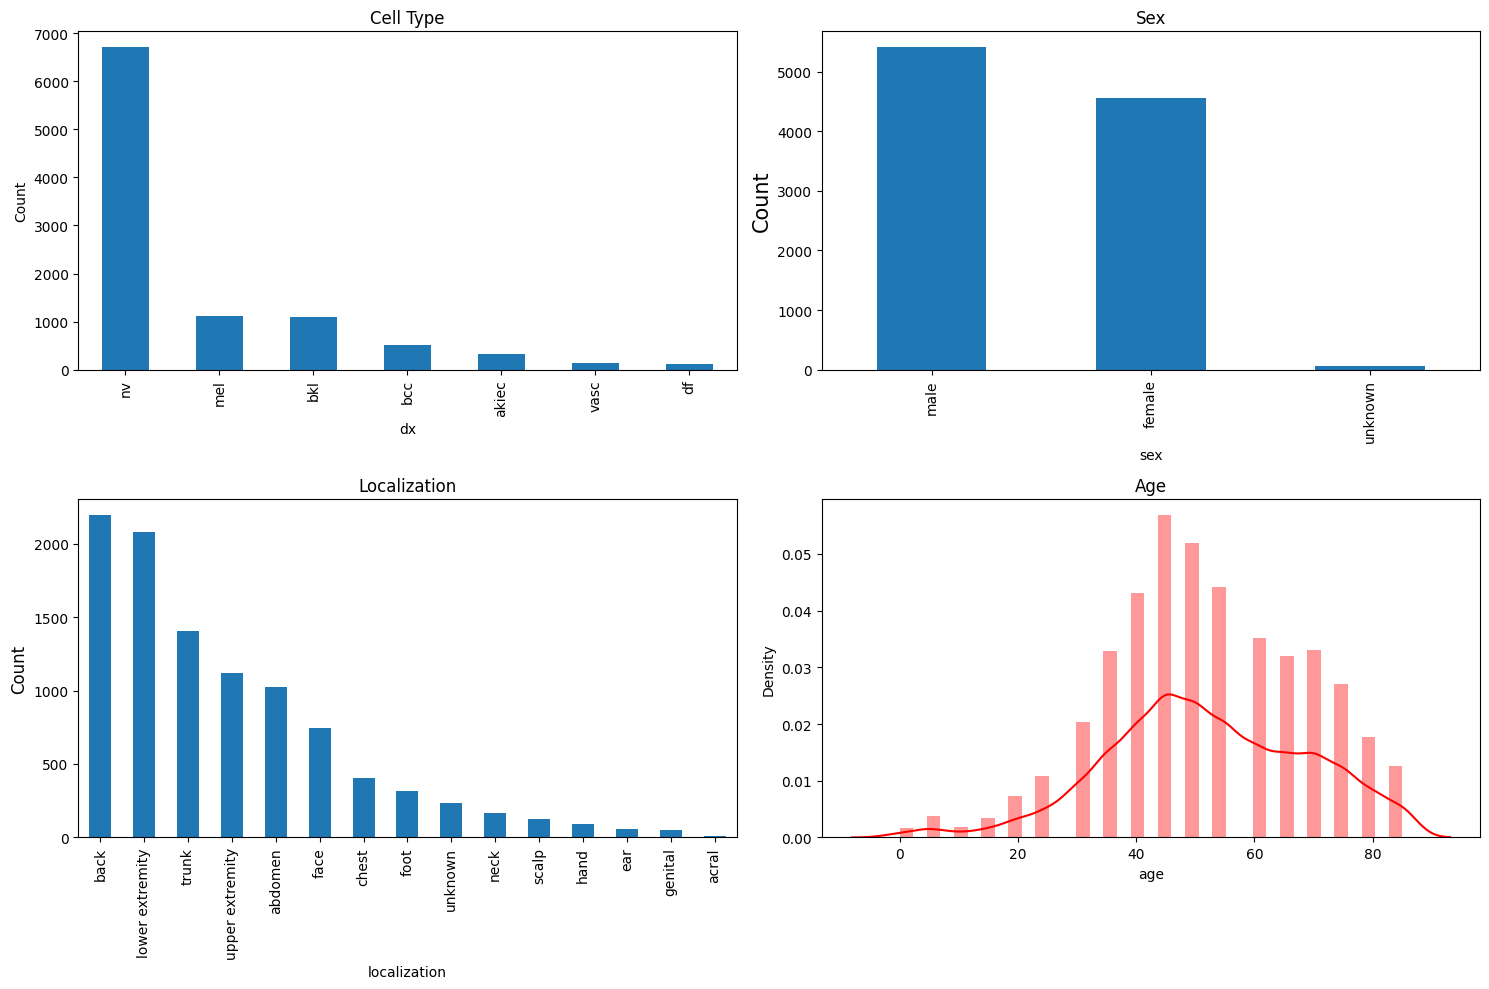

In [28]:
# plotting the different relations for exloratory data analysis in the given 
# dataset for understanding the trends :-
fig = plt.figure(figsize=(15,10))

# Count by Cell Type
ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type')

# Count by Sex
ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex')

# Count by Localization (region)
ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count', size=12)
ax3.set_title('Localization')

# Count by Age
ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], color='red')
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [29]:
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [30]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [31]:
# resampling 800 samples from each class with replacement in order to 
# balance the imbalanced dataset 

n_samples = 800
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=101)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=101)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=101)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=101)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=101)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=101)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=101)

In [32]:
# combining all the above splitted dataframes into a single dataframe for 
# processing. 
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, df_2_balanced, df_3_balanced, df_4_balanced, df_5_balanced, df_6_balanced])
skin_df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,label
9698,HAM_0001499,ISIC_0031929,akiec,histo,65.0,male,lower extremity,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[139, 99, 95], [150, 112, 108], [153, 115, 1...",0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[157, 119, 141], [160, 124, 143], [155, 113,...",0
9750,HAM_0003586,ISIC_0027678,akiec,histo,60.0,male,back,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[149, 96, 92], [150, 95, 90], [155, 102, 99]...",0
9774,HAM_0005389,ISIC_0031012,akiec,histo,70.0,male,lower extremity,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[199, 154, 193], [208, 159, 199], [209, 160,...",0
9762,HAM_0006560,ISIC_0026729,akiec,histo,50.0,male,face,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[181, 136, 142], [182, 138, 143], [182, 137,...",0
...,...,...,...,...,...,...,...,...,...,...
2449,HAM_0005427,ISIC_0028885,vasc,consensus,75.0,male,back,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[179, 89, 102], [178, 88, 100], [179, 87, 10...",6
2421,HAM_0002788,ISIC_0027563,vasc,consensus,70.0,male,lower extremity,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[196, 138, 162], [198, 140, 165], [198, 141,...",6
2336,HAM_0005713,ISIC_0028714,vasc,histo,60.0,female,neck,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[145, 110, 101], [147, 111, 106], [149, 114,...",6
2364,HAM_0003862,ISIC_0032775,vasc,histo,45.0,male,upper extremity,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,"[[[212, 188, 198], [217, 193, 204], [215, 191,...",6


In [33]:
# checking whether the classes are now balanced :- 
print(skin_df_balanced['label'].value_counts())

label
0    800
1    800
2    800
3    800
4    800
5    800
6    800
Name: count, dtype: int64


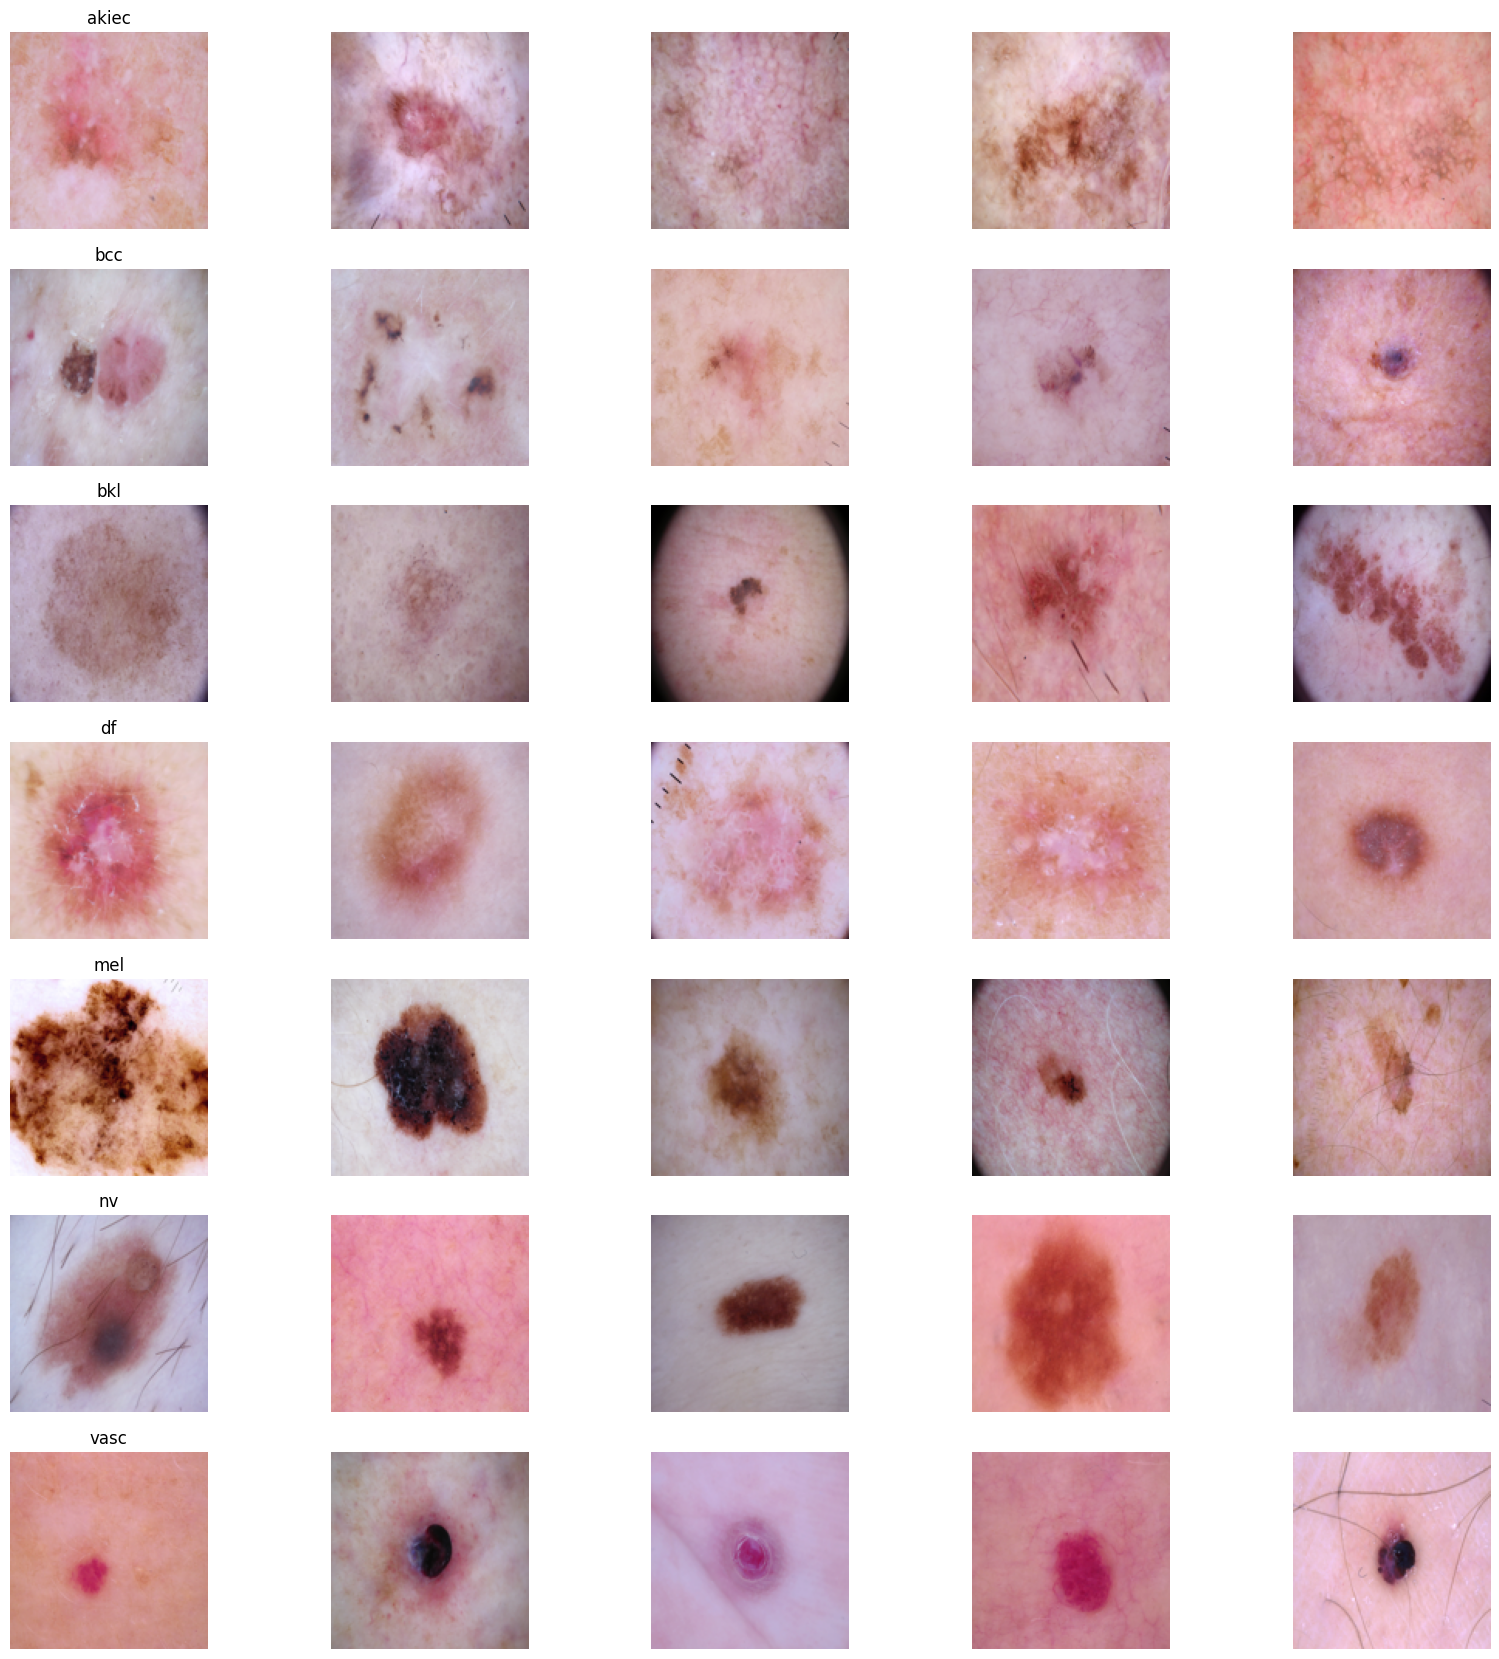

In [34]:
n_samples = 5 # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [35]:
# reshaping the images in order for better processing 
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255
Y = skin_df_balanced['label']
Y_cat = to_categorical(Y, num_classes=7)
Y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
# getting the train test and validation splits , here the testing splitted data 
# will be used for validation 

x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25)

In [37]:
#checking for the tensor shapes of the images :-

skin_df_balanced['image'].map(lambda x: x.shape).value_counts()

image
(128, 128, 3)    5600
Name: count, dtype: int64

In [38]:

'''
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)
'''



'\ntpu = tf.distribute.cluster_resolver.TPUClusterResolver()\ntf.tpu.experimental.initialize_tpu_system(tpu)\ntpu_strategy = tf.distribute.TPUStrategy(tpu)\n'

In [39]:
#ALL the models Initiation and Compilation 

####
# INCEPTION_V3 MODEL :-
####

mod_InceptionV3 = InceptionV3(weights = "imagenet" , include_top = False , input_shape = (128 , 128 , 3))

for layer in mod_InceptionV3.layers:
    layer.trainable = False


x = mod_InceptionV3.output
x = Flatten()(x)
x = Dropout(0.35)(x)
x = Dense(7 , activation = 'softmax')(x)

model_InceptionV3 = Model(inputs = mod_InceptionV3.input , outputs = x)

model_InceptionV3.compile(loss = tf.keras.losses.CategoricalCrossentropy() , 
optimizer = optimizers.Adam(learning_rate = 0.001) , 
metrics = ['accuracy'])


####
# Xception MODEL :-
####
mod_Xception = Xception(weights = "imagenet" , include_top = False , input_shape = (128 , 128 , 3))
for layer in mod_Xception.layers:
    layer.trainable = False

m = mod_Xception.output
m = Flatten()(m)
m = Dropout(0.35)(m)
m = Dense(7 , activation = 'softmax')(m)

model_Xception = Model(inputs = mod_Xception.input , outputs = m)

model_Xception.compile(loss = tf.keras.losses.CategoricalCrossentropy() , 
optimizer = optimizers.Adam(learning_rate = 0.001) , 
metrics = ['accuracy'])


####
# DenseNet201 MODEL :-
####

mod_DenseNet201 = DenseNet201(weights = "imagenet" , include_top = False , input_shape = (128 , 128 , 3))

for layer in mod_DenseNet201.layers:
    layer.trainable = False


z = mod_DenseNet201.output
z = Flatten()(z)
z = Dropout(0.35)(z)
z = Dense(7 , activation = 'softmax')(z)
model_DenseNet201 = Model(inputs = mod_DenseNet201.input , outputs = z)

model_DenseNet201.compile(loss = tf.keras.losses.CategoricalCrossentropy() , 
optimizer = optimizers.Adam(learning_rate = 0.001) , 
metrics = ['accuracy'])




####
# VGG16 MODEL :-
####

mod_VGG16 = VGG16(weights = "imagenet" , include_top = False , input_shape = (128 , 128 , 3))

for layer in mod_VGG16.layers:
    layer.trainable = False


a = mod_VGG16.output
a = Flatten()(a)
a = Dropout(0.35)(a)
a = Dense(7 , activation = 'softmax')(a)

model_VGG16 = Model(inputs = mod_VGG16.input , outputs = a)

model_VGG16.compile(loss = tf.keras.losses.CategoricalCrossentropy() , 
                  optimizer = optimizers.Adam(learning_rate = 0.001) , 
                  metrics = ['accuracy'])




####
# NASNetMobile MODEL :-
####

mod_NASNET = NASNetMobile(weights = "imagenet" , include_top = False , input_shape = (128 , 128 , 3))

for layer in mod_NASNET.layers:
    layer.trainable = False


b = mod_NASNET.output
b = Flatten()(b)
b = Dropout(0.35)(b)
b = Dense(7 , activation = 'softmax')(b)

model_NASNet = Model(inputs = mod_NASNET.input , outputs = b)

model_NASNet.compile(loss = tf.keras.losses.CategoricalCrossentropy() , 
                  optimizer = optimizers.Adam(learning_rate = 0.001) , 
                  metrics = ['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
def matplot_plotting(tr_acc , tr_loss , val_acc , val_loss ):
    epochs = [i+1 for i in range(len(tr_acc))]

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, tr_loss, 'r', label='Train Loss')
    plt.plot(epochs, val_loss, 'g', label='Valid Loss')
    plt.title('Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

Epoch 1/50
  5/263 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.1081 - loss: 5.2824   

I0000 00:00:1715534743.951335     272 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715534744.008482     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3778 - loss: 3.1750

W0000 00:00:1715534757.618547     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715534764.406615     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.3781 - loss: 3.1725 - val_accuracy: 0.5971 - val_loss: 1.5723
Epoch 2/50
  5/263 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7475 - loss: 0.9764

W0000 00:00:1715534769.275421     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6496 - loss: 1.4495 - val_accuracy: 0.6671 - val_loss: 1.3170
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6752 - loss: 1.3230 - val_accuracy: 0.6836 - val_loss: 1.3600
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7366 - loss: 1.0520 - val_accuracy: 0.7057 - val_loss: 1.3320
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7516 - loss: 0.9860 - val_accuracy: 0.6914 - val_loss: 1.6890
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7689 - loss: 0.9278 - val_accuracy: 0.7221 - val_loss: 1.4109
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7782 - loss: 0.9564 - val_accuracy: 0.7657 - val_loss: 1.1535
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8133 - loss: 0.7618 - val_accuracy: 0.7543 - val_loss: 1.2677
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8239 - loss: 0.7221 - val_accuracy: 0.735

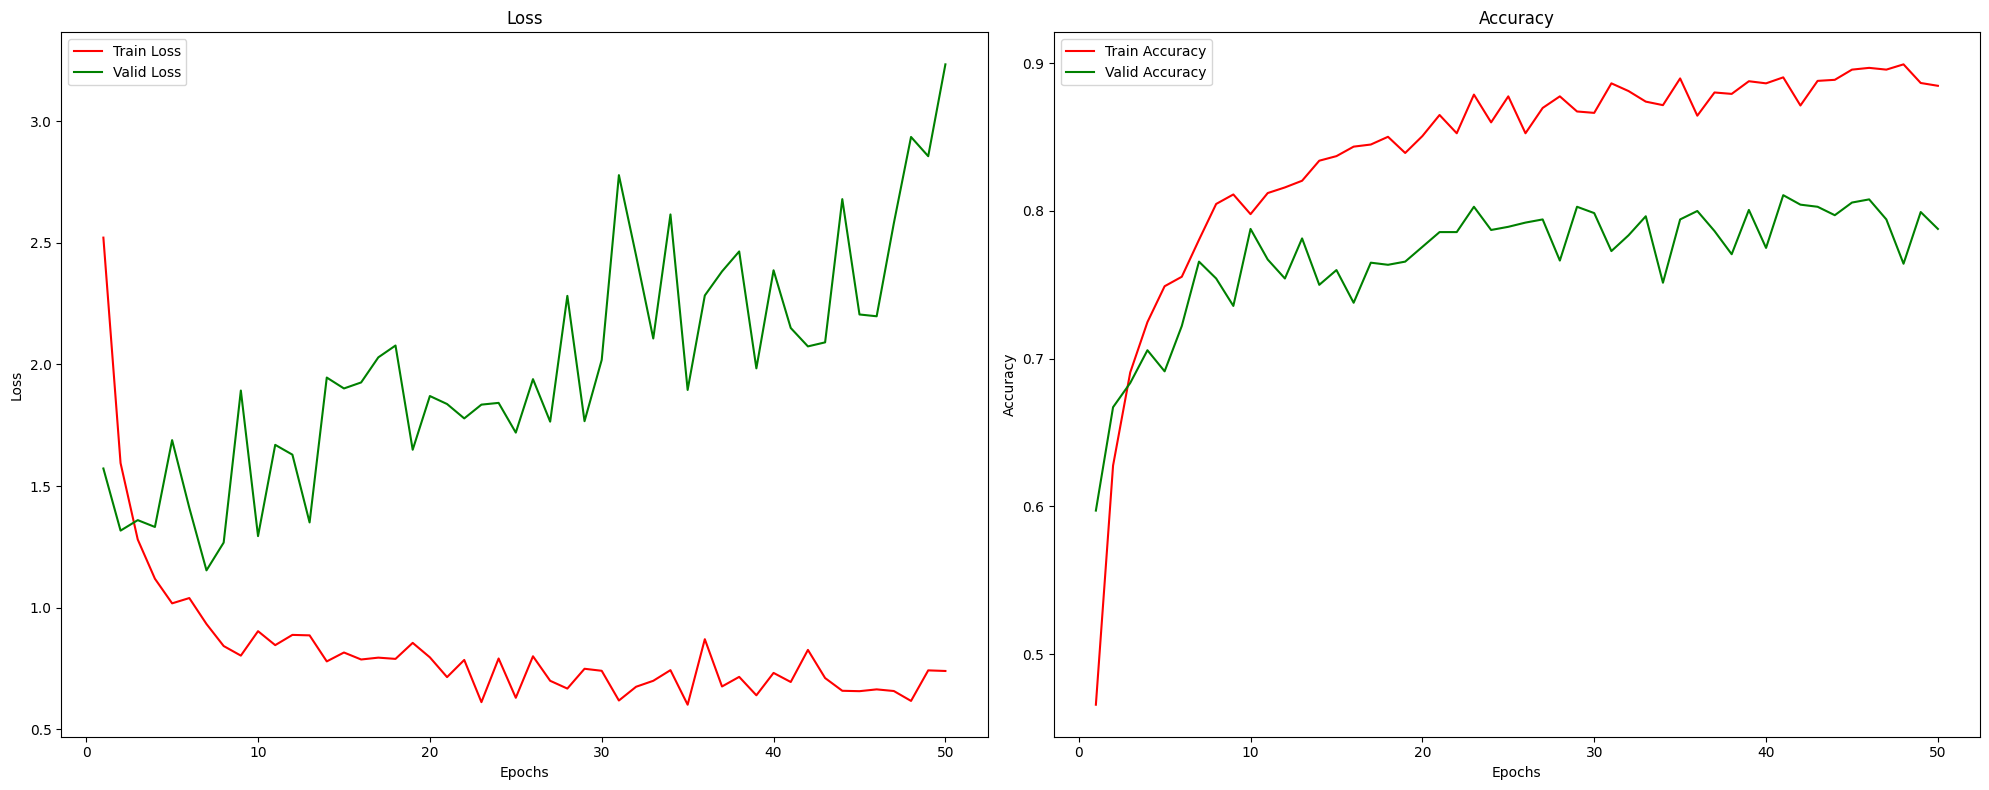

 5/44 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7916 - loss: 3.0224

W0000 00:00:1715535037.939114     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.8020 - loss: 3.0724
Test Accuracy InceptionV3 : 	 0.7878571152687073


W0000 00:00:1715535047.359114     275 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [41]:
# Model fitting of Inception_V3 and basic plotting :-

with tf.device('/device:GPU:0'):
    history_InceptionV3 = model_InceptionV3.fit(x_train , y_train , 
                        epochs = 50 , batch_size = 16 , 
                        validation_data = (x_test , y_test) , 
                        verbose = 1)
    

acc_InceptionV3 = history_InceptionV3.history['accuracy']
loss_InceptionV3 = history_InceptionV3.history['loss']
val_acc_InceptionV3 = history_InceptionV3.history['val_accuracy']
val_loss_InceptionV3 = history_InceptionV3.history['val_loss']

matplot_plotting(acc_InceptionV3 , loss_InceptionV3 , val_acc_InceptionV3 , val_loss_InceptionV3)

model_InceptionV3.save('Inception_V3_HAM10K.h5')

score_InceptionV3 = model_InceptionV3.evaluate(x_test , y_test)
print("Test Accuracy InceptionV3 : \t" , score_InceptionV3[1]) 

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.4683 - loss: 2.0106 - val_accuracy: 0.6379 - val_loss: 1.4965
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7180 - loss: 0.9945 - val_accuracy: 0.6707 - val_loss: 1.2788
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7952 - loss: 0.6721 - val_accuracy: 0.7643 - val_loss: 0.8645
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8235 - loss: 0.5798 - val_accuracy: 0.7700 - val_loss: 0.9544
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8603 - loss: 0.4544 - val_accuracy: 0.7714 - val_loss: 1.0688
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8740 - loss: 0.4314 - val_accuracy: 0.7814 - val_loss: 1.1154
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9042 - loss: 0.3350 - val_accuracy: 0.7850 - val_loss: 1.1026
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8955 - loss: 0.3769 - val_acc

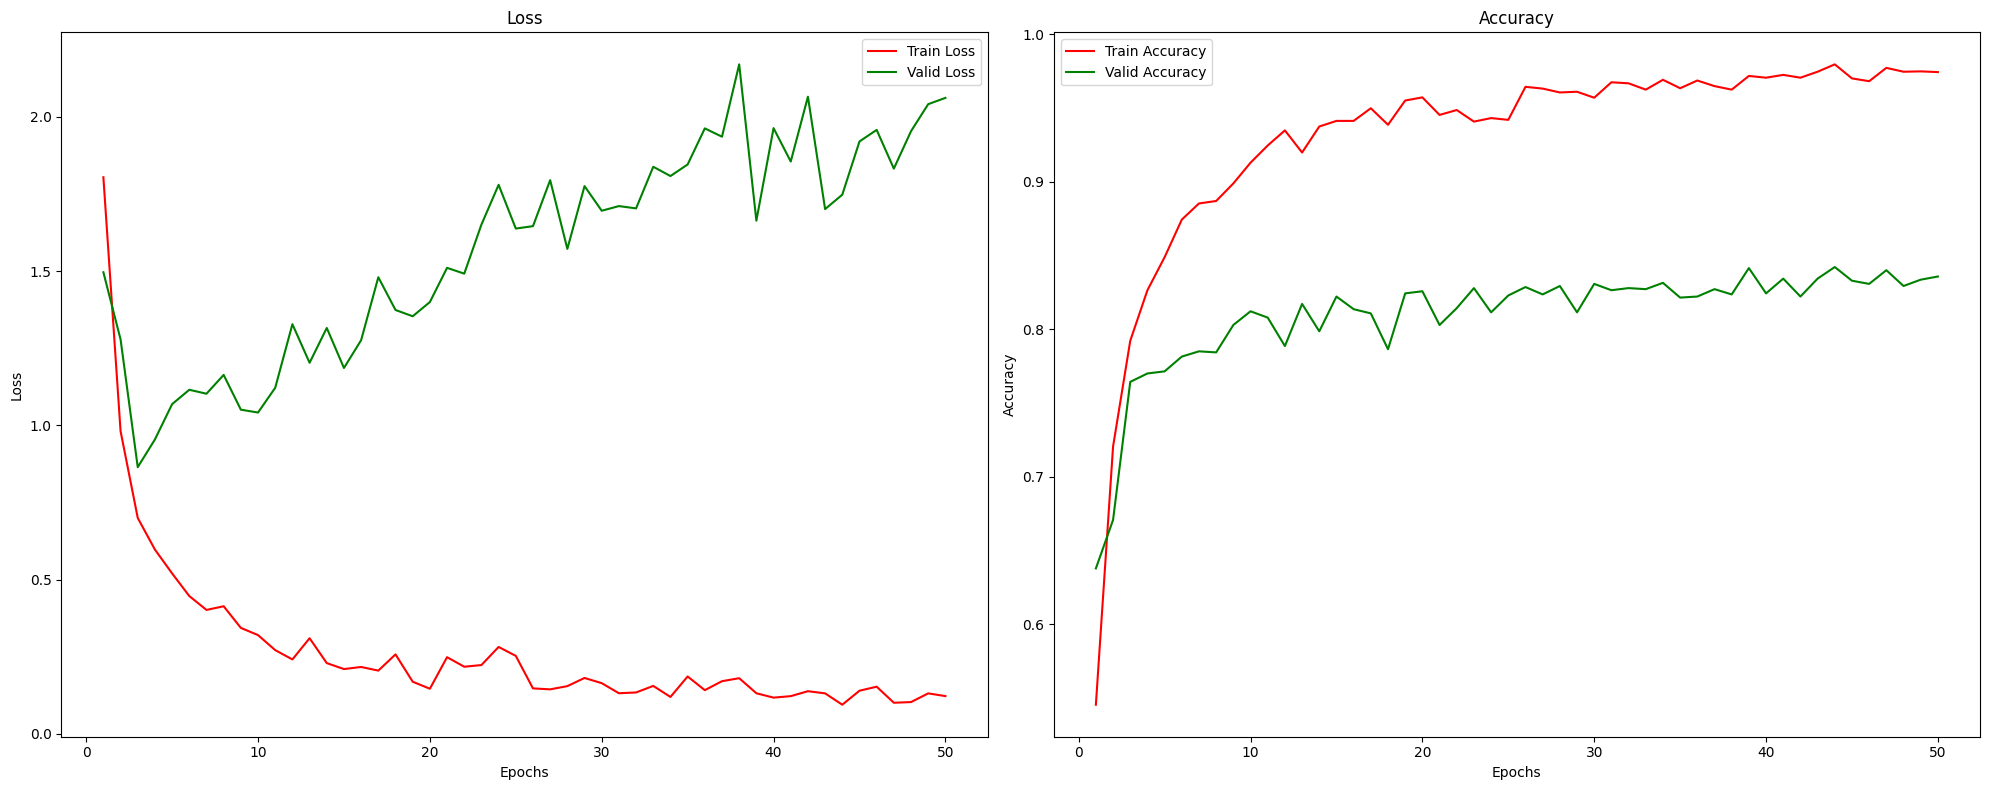

44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.8392 - loss: 2.1004
Test Accuracy Xception : 	 0.8357142806053162


In [42]:
# Model fitting of Xception and basic plotting :-

with tf.device('/device:GPU:0'):
    history_Xception = model_Xception.fit(x_train , y_train , 
                        epochs = 50 , batch_size = 16 , 
                        validation_data = (x_test , y_test) , 
                        verbose = 1)
    

acc_Xception = history_Xception.history['accuracy']
loss_Xception = history_Xception.history['loss']
val_acc_Xception = history_Xception.history['val_accuracy']
val_loss_Xception = history_Xception.history['val_loss']

matplot_plotting(acc_Xception , loss_Xception , val_acc_Xception , val_loss_Xception)

model_Xception.save('Xception_HAM10K.h5')

score_Xception = model_Xception.evaluate(x_test , y_test)
print("Test Accuracy Xception : \t" , score_Xception[1]) 

Epoch 1/50
  7/263 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2045 - loss: 2.1730 

W0000 00:00:1715535457.976002     275 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3497 - loss: 1.7596

W0000 00:00:1715535469.653567     273 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715535471.257425     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.3500 - loss: 1.7587 - val_accuracy: 0.5336 - val_loss: 1.2853
Epoch 2/50
  7/263 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5828 - loss: 1.3301

W0000 00:00:1715535473.745010     273 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5757 - loss: 1.1796 - val_accuracy: 0.5786 - val_loss: 1.1455
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.6421 - loss: 0.9909 - val_accuracy: 0.6371 - val_loss: 0.9983
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.6559 - loss: 0.9351 - val_accuracy: 0.6621 - val_loss: 0.9619
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7043 - loss: 0.8330 - val_accuracy: 0.7021 - val_loss: 0.8629
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7358 - loss: 0.7657 - val_accuracy: 0.6493 - val_loss: 0.9216
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7292 - loss: 0.7567 - val_accuracy: 0.7257 - val_loss: 0.7934
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7406 - loss: 0.7186 - val_accuracy: 0.6979 - val_loss: 0.8411
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7706 - loss: 0.6525 - val_accuracy: 0.745

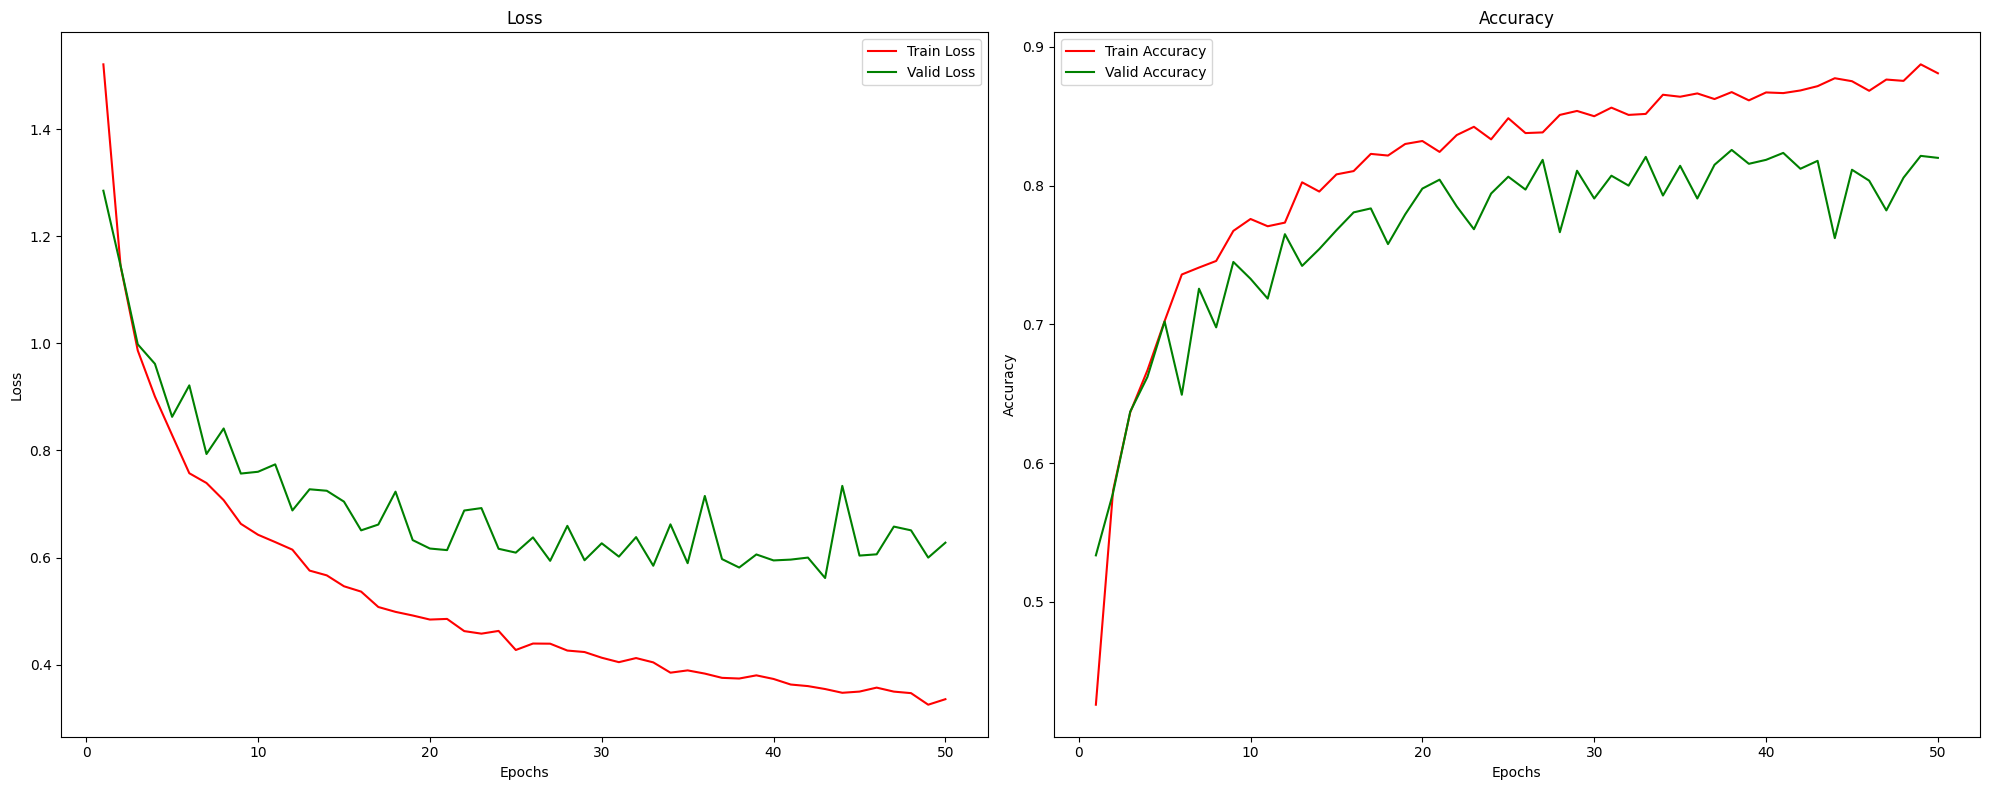

 5/44 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8089 - loss: 0.4394

W0000 00:00:1715535876.646589     275 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - accuracy: 0.8241 - loss: 0.5655
Test Accuracy InceptionV3 : 	 0.8199999928474426


W0000 00:00:1715535888.447325     275 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [43]:
# Model fitting of VGG16 and basic plotting :- 

with tf.device('/device:GPU:0'):
    history_VGG16 = model_VGG16.fit(x_train , y_train , 
                        epochs = 50 , batch_size = 16 , 
                        validation_data = (x_test , y_test) , 
                        verbose = 1)
    
acc_VGG16 = history_VGG16.history['accuracy']
loss_VGG16 = history_VGG16.history['loss']
val_acc_VGG16 = history_VGG16.history['val_accuracy']
val_loss_VGG16 = history_VGG16.history['val_loss']

matplot_plotting(acc_VGG16 , loss_VGG16 , val_acc_VGG16 , val_loss_VGG16)

model_VGG16.save('VGG16_HAM10K.h5')

score_VGG16 = model_VGG16.evaluate(x_test , y_test)
print("Test Accuracy InceptionV3 : \t" , score_VGG16[1]) 

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 111s 239ms/step - accuracy: 0.4952 - loss: 2.2123 - val_accuracy: 0.6993 - val_loss: 1.1225
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7574 - loss: 0.8566 - val_accuracy: 0.7057 - val_loss: 1.3227
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7954 - loss: 0.7275 - val_accuracy: 0.7914 - val_loss: 0.9143
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8597 - loss: 0.4833 - val_accuracy: 0.7664 - val_loss: 1.1492
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8609 - loss: 0.5253 - val_accuracy: 0.8036 - val_loss: 0.9107
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.8951 - loss: 0.3742 - val_accuracy: 0.8314 - val_loss: 0.9463
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8871 - loss: 0.3975 - val_accuracy: 0.8364 - val_loss: 0.8252
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9084 - loss: 0.3203 

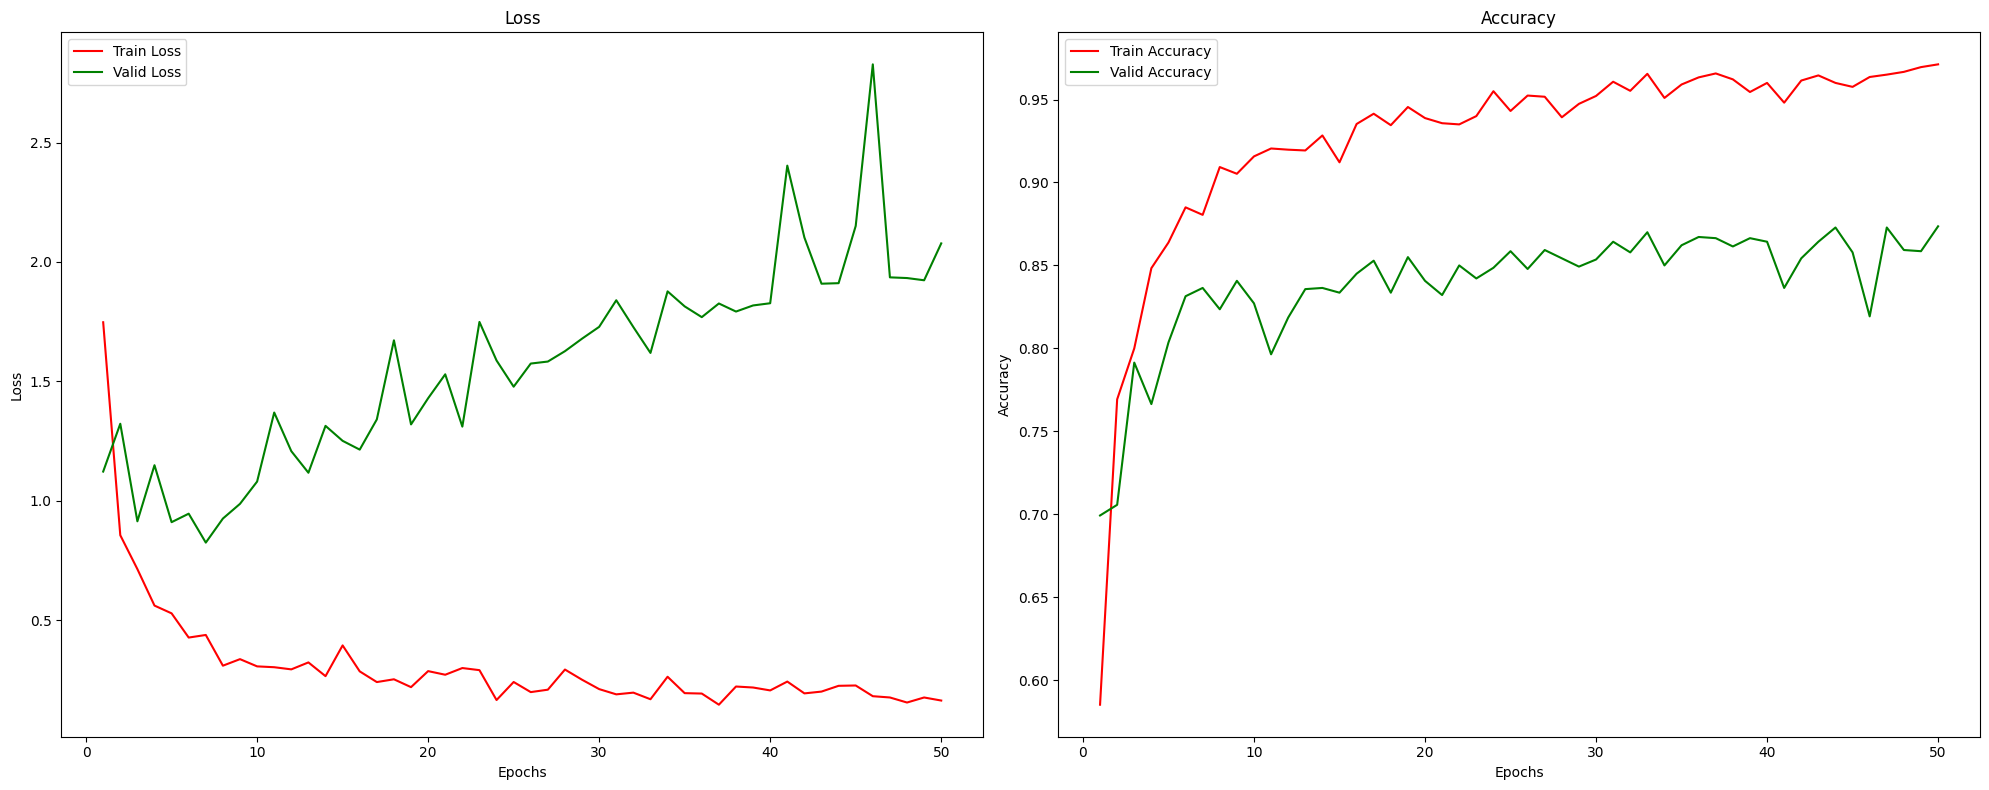

44/44 ━━━━━━━━━━━━━━━━━━━━ 50s 594ms/step - accuracy: 0.8802 - loss: 2.1727
Test Accuracy InceptionV3 : 	 0.8735714554786682


In [44]:
# Model fitting of DenseNet and basic plotting :- 

with tf.device('/device:GPU:0'):
    history_DenseNet201 = model_DenseNet201.fit(x_train , y_train , 
                        epochs = 50 , batch_size = 16 , 
                        validation_data = (x_test , y_test) , 
                        verbose = 1)
    
acc_DenseNet201= history_DenseNet201.history['accuracy']
loss_DenseNet201 = history_DenseNet201.history['loss']
val_acc_DenseNet201 = history_DenseNet201.history['val_accuracy']
val_loss_DenseNet201 = history_DenseNet201.history['val_loss']

matplot_plotting(acc_DenseNet201 , loss_DenseNet201 , val_acc_DenseNet201 , val_loss_DenseNet201)

model_DenseNet201.save('DenseNet201_HAM10K.h5')

score_DenseNet201 = model_DenseNet201.evaluate(x_test , y_test) 
print("Test Accuracy InceptionV3 : \t" , score_DenseNet201[1]) 

Epoch 1/50
  7/263 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.1929 - loss: 2.4350  

W0000 00:00:1715536612.117606     273 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4442 - loss: 1.8299

W0000 00:00:1715536631.296086     273 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715536644.951942     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 78s 160ms/step - accuracy: 0.4445 - loss: 1.8289 - val_accuracy: 0.6479 - val_loss: 1.1409
Epoch 2/50
  5/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6712 - loss: 1.0076

W0000 00:00:1715536654.024991     273 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7569 - loss: 0.8219 - val_accuracy: 0.7379 - val_loss: 0.8954
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8079 - loss: 0.6162 - val_accuracy: 0.7621 - val_loss: 0.8335
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8585 - loss: 0.4782 - val_accuracy: 0.7900 - val_loss: 0.7707
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8787 - loss: 0.4047 - val_accuracy: 0.7921 - val_loss: 0.7587
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9018 - loss: 0.3543 - val_accuracy: 0.8064 - val_loss: 0.7615
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9111 - loss: 0.3016 - val_accuracy: 0.7986 - val_loss: 0.8568
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9112 - loss: 0.3219 - val_accuracy: 0.8150 - val_loss: 0.7901
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9351 - loss: 0.2373 - val_accuracy: 0.79

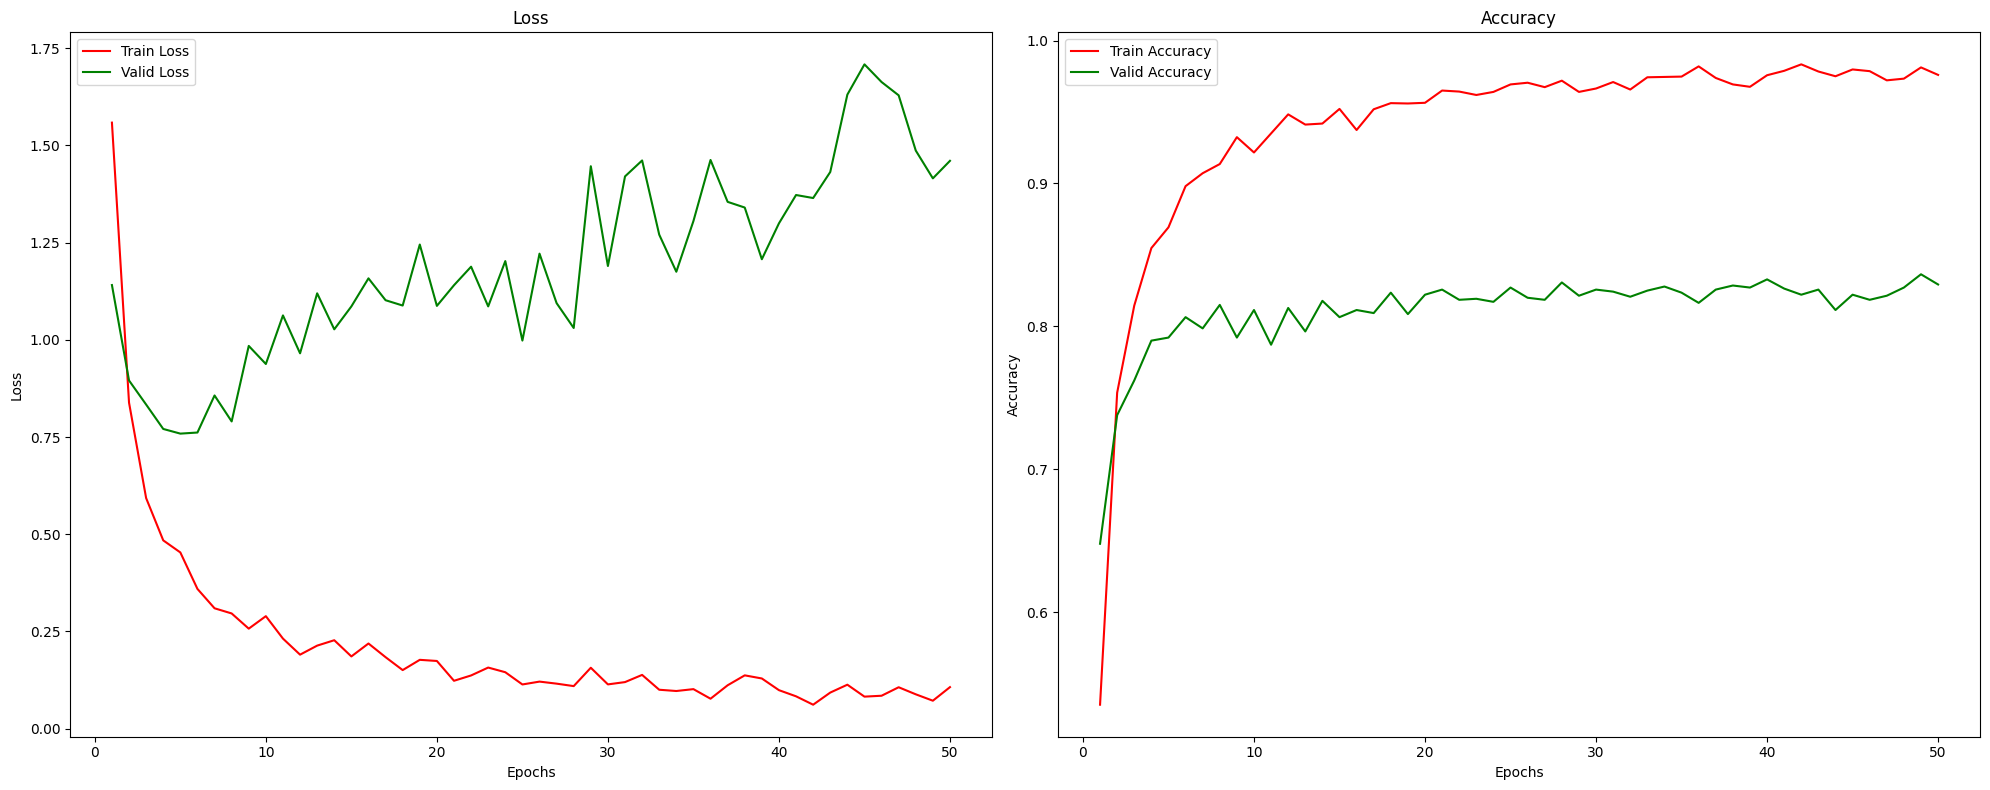

 5/44 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8782 - loss: 0.7632

W0000 00:00:1715536992.523699     275 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 273ms/step - accuracy: 0.8454 - loss: 1.3878
Test Accuracy InceptionV3 : 	 0.829285740852356


W0000 00:00:1715537004.263417     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [45]:
# Model fitting of NASNet and basic plotting :- 

with tf.device('/device:GPU:0'):
    history_NASNet = model_NASNet.fit(x_train , y_train , 
                        epochs = 50 , batch_size = 16 , 
                        validation_data = (x_test , y_test) , 
                        verbose = 1)
    
acc_NASNet = history_NASNet.history['accuracy']
loss_NASNet = history_NASNet.history['loss']
val_acc_NASNet = history_NASNet.history['val_accuracy']
val_loss_NASNet = history_NASNet.history['val_loss']

matplot_plotting(acc_NASNet , loss_NASNet , val_acc_NASNet , val_loss_NASNet)

model_NASNet.save('NASNet_HAM10K.h5')

score_NASNet = model_NASNet.evaluate(x_test , y_test)
print("Test Accuracy InceptionV3 : \t" , score_NASNet[1]) 

In [46]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Add traces
fig.add_trace(
    go.Scatter( y= acc_InceptionV3, name="InceptionV3")
   
)

fig.add_trace(
    go.Scatter( y= acc_Xception, name="Xception")

)

fig.add_trace(
    go.Scatter( y= acc_VGG16, name="VGG16")
    
)

fig.add_trace(
    go.Scatter( y= acc_DenseNet201, name="DenseNet201")
    
)

fig.add_trace(
    go.Scatter( y= acc_NASNet, name="NASNetMobile")
    
)
# Add figure title
fig.update_layout(
    title_text="Accuracy of all Models :"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Accuracy</b>", secondary_y=False)


fig.show()

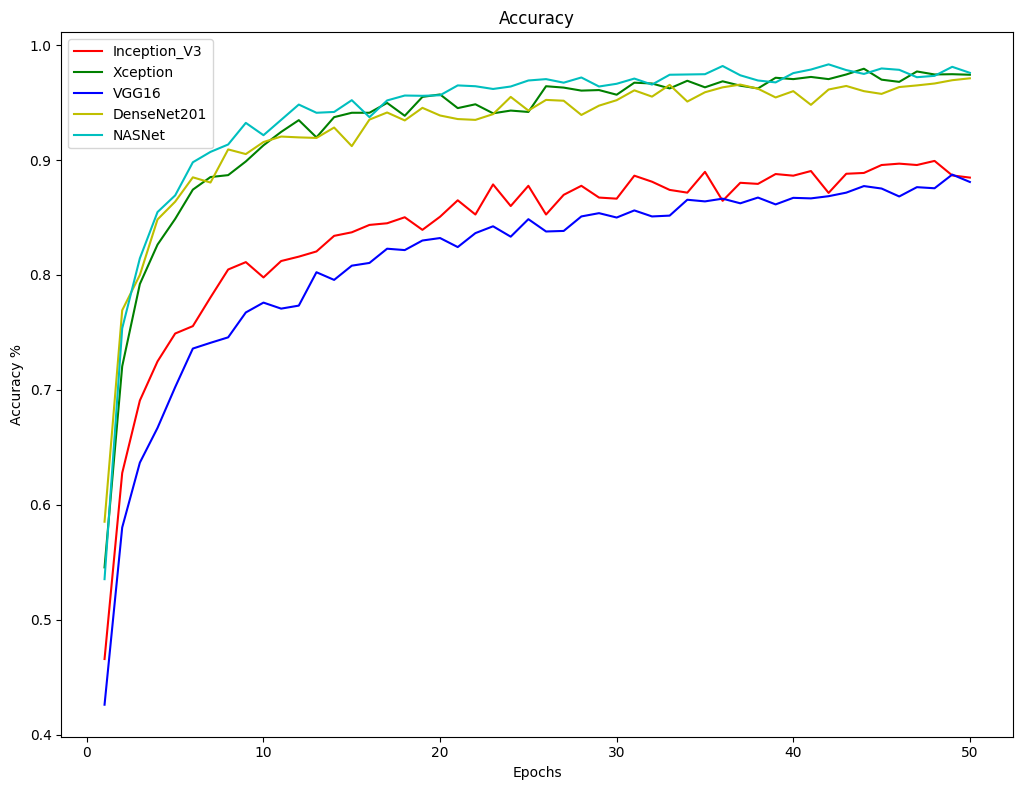

In [50]:
epochs = [i+1 for i in range(len(acc_InceptionV3))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_InceptionV3, 'r', label='Inception_V3')
plt.plot(epochs, acc_Xception , 'g', label='Xception')
plt.plot(epochs, acc_VGG16, 'b', label='VGG16')
plt.plot(epochs, acc_DenseNet201, 'y', label='DenseNet201')
plt.plot(epochs, acc_NASNet, 'c', label='NASNet')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')

plt.tight_layout()
plt.show()

In [ ]:
/kaggle/working/